## Import Necessary Libraries

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Loading

In [260]:
data = pd.read_csv('../3_Data/processed/2025_hourly_all_EDA_cleaned.csv')
data.head()

,tpep_pickup_datetime,passenger_demand,taxi_demand
0,2025-01-01 00:00:00,9132,7344
1,2025-01-01 01:00:00,8996,8468
2,2025-01-01 02:00:00,7364,7257
3,2025-01-01 03:00:00,4904,4915
4,2025-01-01 04:00:00,3015,2918


In [261]:
data.tail()

,tpep_pickup_datetime,passenger_demand,taxi_demand
6566,2025-09-30 19:00:00,9595,9779
6567,2025-09-30 20:00:00,8882,9539
6568,2025-09-30 21:00:00,9048,9965
6569,2025-09-30 22:00:00,7026,8001
6570,2025-09-30 23:00:00,3984,4587


In [262]:
data.shape

(6571, 3)

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6571 entries, 0 to 6570
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tpep_pickup_datetime  6571 non-null   object
 1   passenger_demand      6571 non-null   int64 
 2   taxi_demand           6571 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 154.1+ KB


In [264]:
df = data.copy()

In [265]:
df['timestamp'] = pd.to_datetime(df.tpep_pickup_datetime)

In [266]:
df.columns

Index(['tpep_pickup_datetime', 'passenger_demand', 'taxi_demand', 'timestamp'], dtype='object')

In [267]:
df.drop(columns=['tpep_pickup_datetime'], inplace= True)

In [268]:
df.sort_values('timestamp', inplace=True)

In [269]:
df

,passenger_demand,taxi_demand,timestamp
0,9132,7344,2025-01-01 00:00:00
1,8996,8468,2025-01-01 01:00:00
2,7364,7257,2025-01-01 02:00:00
3,4904,4915,2025-01-01 03:00:00
4,3015,2918,2025-01-01 04:00:00
...,...,...,...
6566,9595,9779,2025-09-30 19:00:00
6567,8882,9539,2025-09-30 20:00:00
6568,9048,9965,2025-09-30 21:00:00
6569,7026,8001,2025-09-30 22:00:00


## Checking Duplicates

In [270]:
valus_counts = df.duplicated(subset=['timestamp']).sum()
print(f'Number of duplicate timestamps: {valus_counts}')

Number of duplicate timestamps: 19


In [271]:
value_counts  = df.duplicated(subset='timestamp').value_counts()
print(value_counts )

False    6552
True       19
Name: count, dtype: int64


As we can see there is 19 duplicates values we have to remove it

In [272]:
print(f"Before dropping duplicates: {df.shape}")

Before dropping duplicates: (6571, 3)


## Dropping Duplicates

In [273]:
df.drop_duplicates(subset= ['timestamp'], inplace=True)

In [274]:
df.duplicated().sum()

np.int64(0)

In [275]:
print(f"After dropping duplicates: {df.shape}")

After dropping duplicates: (6552, 3)


In [276]:
df = df[~(df.timestamp > pd.Timestamp('2025-12-31 00:00:00'))]
df

,passenger_demand,taxi_demand,timestamp
0,9132,7344,2025-01-01 00:00:00
1,8996,8468,2025-01-01 01:00:00
2,7364,7257,2025-01-01 02:00:00
3,4904,4915,2025-01-01 03:00:00
4,3015,2918,2025-01-01 04:00:00
...,...,...,...
6566,9595,9779,2025-09-30 19:00:00
6567,8882,9539,2025-09-30 20:00:00
6568,9048,9965,2025-09-30 21:00:00
6569,7026,8001,2025-09-30 22:00:00


## Handling Missing Values
<ol>Detect</ol>
<ol>Remove or Drop</ol>
<ol>Filtering</ol>
<ol>if the data is categorical then we have to use "Mode"</ol>
<ol>if data is numerical, we have to use "mean", and "median".</ol>

## Detect Missing values

In [277]:
df.isnull()

,passenger_demand,taxi_demand,timestamp
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
6566,False,False,False
6567,False,False,False
6568,False,False,False
6569,False,False,False


In [278]:
df.isnull().sum()

passenger_demand    0
taxi_demand         0
timestamp           0
dtype: int64

In [279]:
df.isnull().sum().value_counts()

0    3
Name: count, dtype: int64

In [280]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
6566    0
6567    0
6568    0
6569    0
6570    0
Length: 6552, dtype: int64

In [281]:
df.isnull().sum(axis=1).value_counts()

0    6552
Name: count, dtype: int64

#### There is no Missing Value

## Handling Outliers

<li>Ways to handle
    <ol>Detect Outliers</ol>
    <ol>Dropping outliers</ol>
    <ol>Imputation - Median</ol>
    <ol>Quantile-based flooring and capping</ol>
    <ol>Transformations - Log transformation can help to reduce the effect of outliers</ol>
</li>
<li>if the data is categorical then we have to use "Mode"</li>
<li>if data is numerical, we have to use "mean", and "median".</li>
<li>IsolationForest</li>
<li>pyod</li>

## Detect Outliers

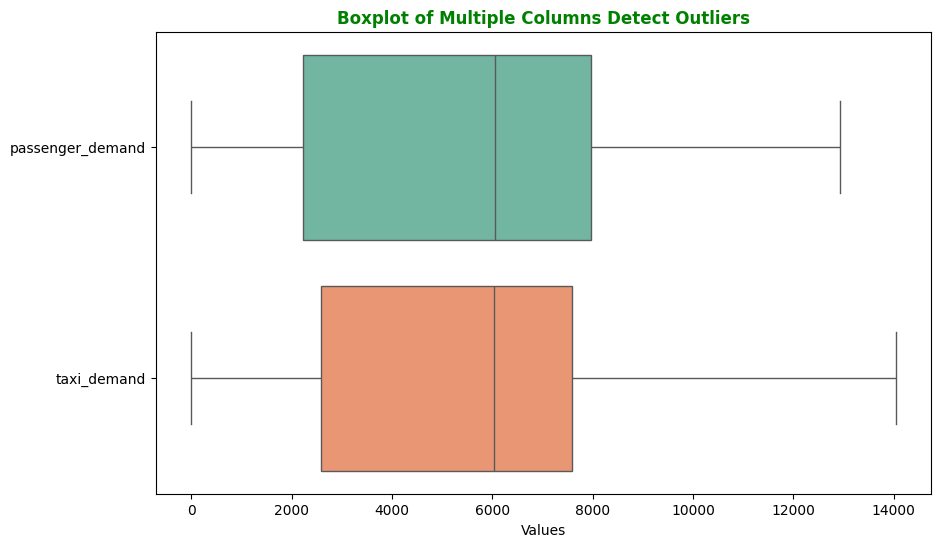

In [282]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h", palette="Set2")  # orient="h" for horizontal boxplots
plt.title('Boxplot of Multiple Columns Detect Outliers', color='green', weight= 'bold')
plt.xlabel('Values')
plt.show()

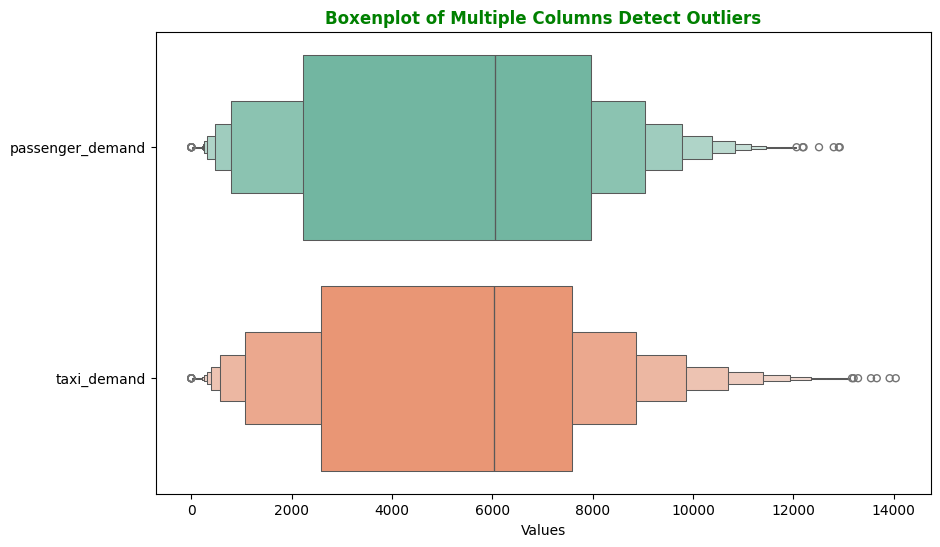

In [283]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, orient="h", palette="Set2")  # orient="h" for horizontal boxplots
plt.title('Boxenplot of Multiple Columns Detect Outliers', color="green", weight= 'bold')
plt.xlabel('Values')
plt.show()

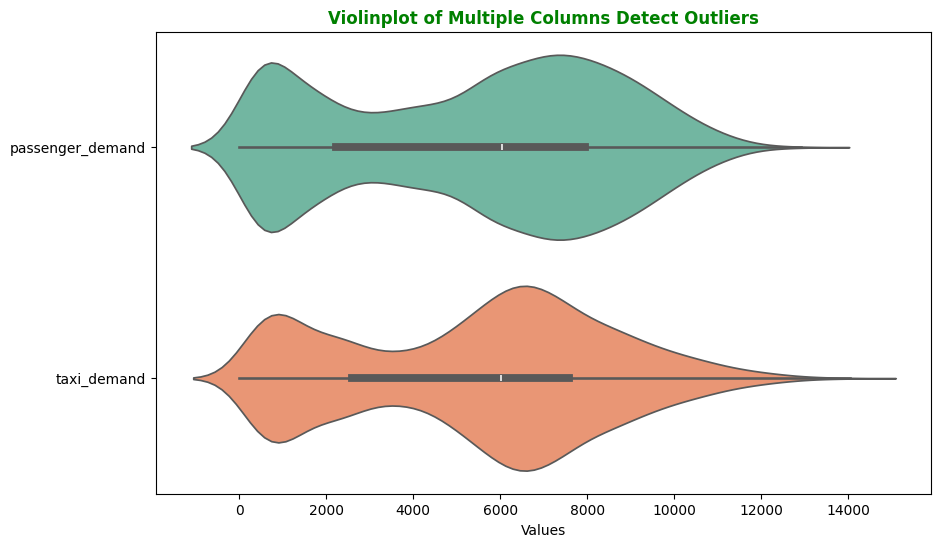

In [284]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, orient="h", palette="Set2")  # orient="h" for horizontal boxplots
plt.title('Violinplot of Multiple Columns Detect Outliers', color="green", weight= 'bold')
plt.xlabel('Values')
plt.show()

<Axes: xlabel='passenger_demand'>

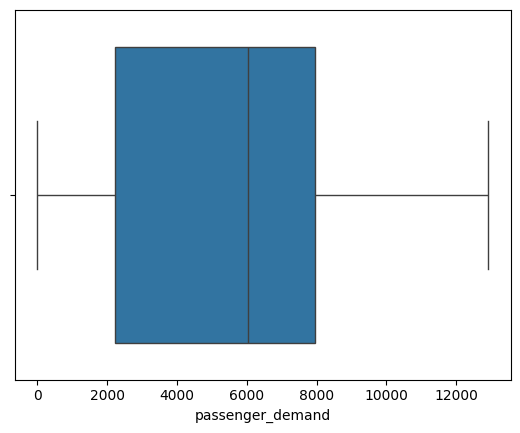

In [285]:
sns.boxplot(data=df, x='passenger_demand')

<Axes: xlabel='passenger_demand'>

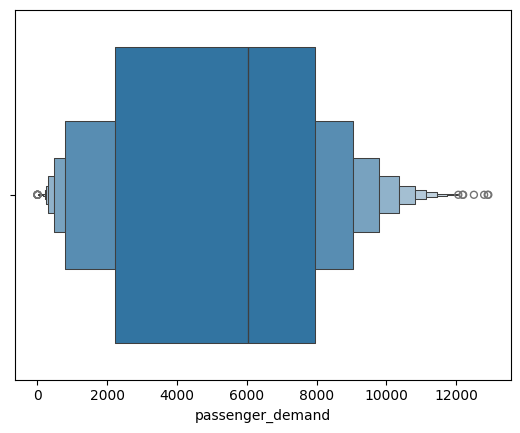

In [286]:
sns.boxenplot(data=df, x='passenger_demand')

<Axes: xlabel='passenger_demand'>

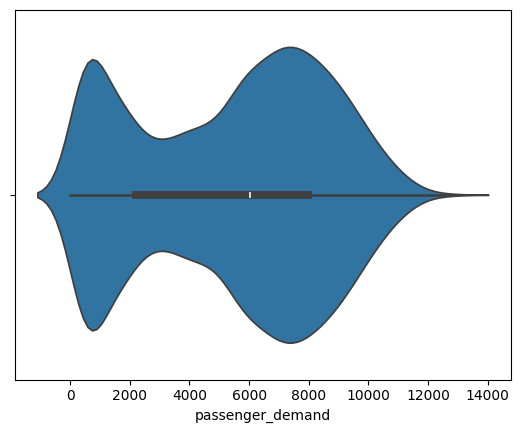

In [287]:
sns.violinplot(data=df, x='passenger_demand')

<Axes: xlabel='taxi_demand'>

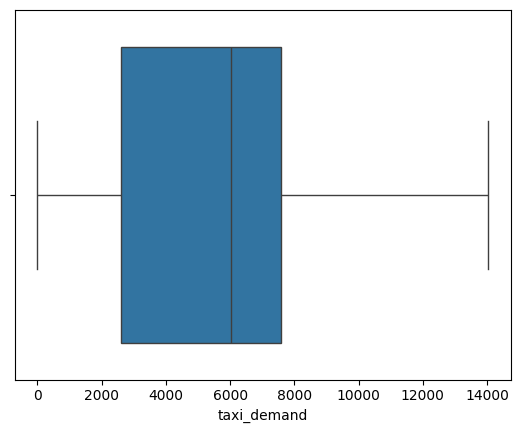

In [288]:
sns.boxplot(data=df, x='taxi_demand')

There is no outliers in "passenger_demand" and "taxi_demand"

In [289]:
df

,passenger_demand,taxi_demand,timestamp
0,9132,7344,2025-01-01 00:00:00
1,8996,8468,2025-01-01 01:00:00
2,7364,7257,2025-01-01 02:00:00
3,4904,4915,2025-01-01 03:00:00
4,3015,2918,2025-01-01 04:00:00
...,...,...,...
6566,9595,9779,2025-09-30 19:00:00
6567,8882,9539,2025-09-30 20:00:00
6568,9048,9965,2025-09-30 21:00:00
6569,7026,8001,2025-09-30 22:00:00


## Save Clean Data

In [290]:
df.to_csv('../3_Data/processed/2025_hourly_all_cleaned.csv', index=False)

### Extract Pipeline for Clean Data

In [ ]:
import logging
import pandas as pd
from zenml import step
from typing import Union
from dask import dataframe as dd
from logs import configure_logger

logger = configure_logger()


@step(
    name="Data Cleaning",
    enable_step_logs=True,
    enable_artifact_metadata=True
)
def clean_data(data: Union[pd.DataFrame, dd.DataFrame]) -> Union[pd.DataFrame, dd.DataFrame, None]:
    """
    Clean the data by:
    - Dropping duplicates and null values
    - Converting datetime column
    - Renaming key columns
    - Removing extreme outliers
    """

    try:
        logger.info("==> Processing clean_data()")

        # Handle both Dask and Pandas
        is_dask = isinstance(data, dd.DataFrame)
        if is_dask:
            data = data.compute()
            logger.info("Converted Dask DataFrame to pandas for cleaning.")

        # -----------------------------------
        # Drop duplicates & NaNs
        # -----------------------------------
        data = data.drop_duplicates()
        data = data.dropna(axis=0, how="any")

        # -----------------------------------
        # Standardize datetime and columns
        # -----------------------------------
        if "tpep_pickup_datetime" in data.columns:
            data["timestamp"] = pd.to_datetime(data["tpep_pickup_datetime"], errors="coerce")
            data.drop(columns=["tpep_pickup_datetime"], inplace=True)

        data.rename(
            columns={
                "passenger_count": "passenger_demand",
                "VendorID": "taxi_demand",
            },
            inplace=True,
        )

        # -----------------------------------
        # Drop duplicates on timestamp
        # -----------------------------------
        before_dupes = len(data)
        data.drop_duplicates(subset=["timestamp"], inplace=True)
        after_dupes = len(data)
        logger.info(f"Removed {before_dupes - after_dupes} duplicate timestamps")

        # -----------------------------------
        # Handle Outliers (IQR method)
        # -----------------------------------
        for col in ["passenger_demand", "taxi_demand"]:
            if col in data.columns:
                Q1 = data[col].quantile(0.25)
                Q3 = data[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR
                before = len(data)
                data = data[(data[col] >= lower) & (data[col] <= upper)]
                after = len(data)
                logger.info(f"{col}: removed {before - after} outliers (IQR bounds [{lower:.2f}, {upper:.2f}])")

        # -----------------------------------
        # Final summary
        # -----------------------------------
        data.sort_values("timestamp", inplace=True)
        logger.info(f"Final shape after cleaning: {data.shape}")
        logger.info("==> Successfully processed clean_data()")

        return data

    except Exception as e:
        logger.error(f"==> Error in clean_data(): {e}")
        return None
